In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [20]:
df = pd.read_csv('./datasets/강남.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
1,송파구,2016-01-01,84.93,11,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,21,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,46450
2,서초구,2016-01-01,134.36,12,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,11,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,94000
3,용산구,2016-01-02,114.48,7,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,15,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,62500
4,강남구,2016-01-02,110.39,6,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,27,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,133000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100346,서초구,2022-12-31,84.98,23,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,16,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,194000
100347,강남구,2022-12-31,76.79,2,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,43,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,184000
100348,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,18,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,250000
100349,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,138000


# Train/Test Split

In [21]:
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])

In [22]:
train_df = df.loc[df['계약일'] < '2021']

In [23]:
test_df = df.loc[df['계약일'] >= '2021']

# feature & target split

In [24]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

In [25]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# Scaling
1. Features - MinMax
2. Target - Log

In [26]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

85340     5.079181
85341     5.245513
85342     5.439333
85343     5.250420
85344     5.110590
            ...   
100346    5.287802
100347    5.264818
100348    5.397940
100349    5.139879
100350    5.235528
Name: 물건금액(만원), Length: 15011, dtype: float64

# OLS - Scaling 후
## OLS_1

In [28]:
# OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     5502.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:06:17   Log-Likelihood:                 32245.
No. Observations:               85340   AIC:                        -6.445e+04
Df Residuals:                   85320   BIC:                        -6.426e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1011      0.020    258.440      0.000       5.062       5.140
건물면적(㎡)               1.5167      0.006    252.868      0.000       1.505       1.528
층                     0.2890      0.006     49.082      0.000       0.277       0.301
KOSPI종가              -0.0449      0.014     -3.127      0.002      -0.073      -0.017
Fed기준금리              -0.0623      0.008     -8.111      0.000      -0.077      -0.047
국제유가(Dubai)($/배럴)     0.1401      0.008     16.700      0.000       0.124       0.157
부동산거래량               -0.0050      0.004     -1.123      0.261      -0.014       0.004
국고채5년(평균)            -0.3149      0.043     -7.405      0.000      -0.398      -0.232
국고채10년(평균)            0.3665      0.030     12.314      0.000       0.308       0.425
회사채3년(평균)             0.1022      0.012      8.361      0.000       0.078       0.126
CD91물(평균)            -0.2164      0.019    -11.558      0.000      -0.253      -0.180
BOK기준금리              -0.0908      0.015     -6.132      0.000      -0.120      -0.062
건물연식                  0.1284      0.003     47.348      0.000       0.123       0.134
GDP대비가계부채비율          -0.1210      0.014     -8.744      0.000      -0.148      -0.094
환율종가                 -0.0390      0.007     -5.654      0.000      -0.052      -0.025
선행지수순환변동치             0.0609      0.010      6.111      0.000       0.041       0.080
EPU                  -0.0132      0.004     -3.125      0.002      -0.021      -0.005
장단기금리spread          -0.2505      0.019    -13.115      0.000      -0.288      -0.213
금값종가                 -0.1365      0.013    -10.298      0.000      -0.162      -0.111
LTV                  -0.3082      0.005    -62.109      0.000      -0.318      -0.298
==============================================================================
Omnibus:                     1715.144   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1820.100
Skew:                          -0.353   Prob(JB):                         0.00
Kurtosis:                       3.110   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 부동산 거래량 컬럼 삭제

In [29]:
X_scaled.drop('부동산거래량', axis=1, inplace=True)

In [30]:
# OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     5807.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:06:17   Log-Likelihood:                 32245.
No. Observations:               85340   AIC:                        -6.445e+04
Df Residuals:                   85321   BIC:                        -6.427e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1000      0.020    258.684      0.000       5.061       5.139
건물면적(㎡)               1.5167      0.006    252.865      0.000       1.505       1.528
층                     0.2891      0.006     49.099      0.000       0.278       0.301
KOSPI종가              -0.0490      0.014     -3.519      0.000      -0.076      -0.022
Fed기준금리              -0.0616      0.008     -8.045      0.000      -0.077      -0.047
국제유가(Dubai)($/배럴)     0.1382      0.008     16.823      0.000       0.122       0.154
국고채5년(평균)            -0.3118      0.042     -7.347      0.000      -0.395      -0.229
국고채10년(평균)            0.3663      0.030     12.309      0.000       0.308       0.425
회사채3년(평균)             0.1047      0.012      8.703      0.000       0.081       0.128
CD91물(평균)            -0.2184      0.019    -11.718      0.000      -0.255      -0.182
BOK기준금리              -0.0883      0.015     -6.031      0.000      -0.117      -0.060
건물연식                  0.1285      0.003     47.400      0.000       0.123       0.134
GDP대비가계부채비율          -0.1214      0.014     -8.772      0.000      -0.148      -0.094
환율종가                 -0.0396      0.007     -5.768      0.000      -0.053      -0.026
선행지수순환변동치             0.0634      0.010      6.529      0.000       0.044       0.082
EPU                  -0.0118      0.004     -2.925      0.003      -0.020      -0.004
장단기금리spread          -0.2551      0.019    -13.682      0.000      -0.292      -0.219
금값종가                 -0.1343      0.013    -10.244      0.000      -0.160      -0.109
LTV                  -0.3085      0.005    -62.309      0.000      -0.318      -0.299
==============================================================================
Omnibus:                     1718.238   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1823.588
Skew:                          -0.354   Prob(JB):                         0.00
Kurtosis:                       3.111   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [32]:
# VIF_2
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      5.290755            건물면적(㎡)
1      3.976560                  층
2    153.489706            KOSPI종가
3     48.727108            Fed기준금리
4     71.978766  국제유가(Dubai)($/배럴)
5   1191.750243          국고채5년(평균)
6    771.530466         국고채10년(평균)
7    115.086548          회사채3년(평균)
8    263.733646          CD91물(평균)
9    253.304056            BOK기준금리
10     4.572737               건물연식
11   114.715288        GDP대비가계부채비율
12    26.846003               환율종가
13   118.365150          선행지수순환변동치
14     5.265925                EPU
15   189.666295        장단기금리spread
16    62.594189               금값종가
17    30.863134                LTV


### 국고채 5년 삭제

In [33]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

In [34]:
# OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     6142.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:08:37   Log-Likelihood:                 32218.
No. Observations:               85340   AIC:                        -6.440e+04
Df Residuals:                   85322   BIC:                        -6.423e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1659      0.018    294.075      0.000       5.131       5.200
건물면적(㎡)               1.5174      0.006    252.940      0.000       1.506       1.529
층                     0.2893      0.006     49.119      0.000       0.278       0.301
KOSPI종가              -0.0577      0.014     -4.157      0.000      -0.085      -0.030
Fed기준금리              -0.0774      0.007    -10.549      0.000      -0.092      -0.063
국제유가(Dubai)($/배럴)     0.1343      0.008     16.386      0.000       0.118       0.150
국고채10년(평균)            0.1919      0.018     10.691      0.000       0.157       0.227
회사채3년(평균)             0.0740      0.011      6.559      0.000       0.052       0.096
CD91물(평균)            -0.2732      0.017    -15.981      0.000      -0.307      -0.240
BOK기준금리              -0.1374      0.013    -10.543      0.000      -0.163      -0.112
건물연식                  0.1290      0.003     47.608      0.000       0.124       0.134
GDP대비가계부채비율          -0.0883      0.013     -6.747      0.000      -0.114      -0.063
환율종가                 -0.0229      0.006     -3.529      0.000      -0.036      -0.010
선행지수순환변동치             0.0713      0.010      7.377      0.000       0.052       0.090
EPU                  -0.0195      0.004     -5.017      0.000      -0.027      -0.012
장단기금리spread          -0.3496      0.014    -25.887      0.000      -0.376      -0.323
금값종가                 -0.1593      0.013    -12.576      0.000      -0.184      -0.134
LTV                  -0.3021      0.005    -61.968      0.000      -0.312      -0.293
==============================================================================
Omnibus:                     1716.872   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1821.817
Skew:                          -0.354   Prob(JB):                         0.00
Kurtosis:                       3.102   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# VIF_3
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.250219            건물면적(㎡)
1     3.968043                  층
2   151.871389            KOSPI종가
3    43.052145            Fed기준금리
4    71.742987  국제유가(Dubai)($/배럴)
5   227.970135         국고채10년(평균)
6   101.698351          회사채3년(평균)
7   258.181187          CD91물(평균)
8   224.074126            BOK기준금리
9     4.547548               건물연식
10   90.144454        GDP대비가계부채비율
11   18.364140               환율종가
12  115.748101          선행지수순환변동치
13    5.077615                EPU
14  125.236411        장단기금리spread
15   61.694778               금값종가
16   23.795756                LTV


### CD91물(평균) 컬럼 삭제

In [36]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

In [37]:
# OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     6490.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:10:14   Log-Likelihood:                 32090.
No. Observations:               85340   AIC:                        -6.415e+04
Df Residuals:                   85323   BIC:                        -6.399e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9989      0.014    353.514      0.000       4.971       5.027
건물면적(㎡)               1.5206      0.006    253.238      0.000       1.509       1.532
층                     0.2898      0.006     49.122      0.000       0.278       0.301
KOSPI종가               0.0036      0.013      0.270      0.788      -0.023       0.030
Fed기준금리              -0.0937      0.007    -12.872      0.000      -0.108      -0.079
국제유가(Dubai)($/배럴)     0.1314      0.008     16.007      0.000       0.115       0.147
국고채10년(평균)            0.0223      0.014      1.538      0.124      -0.006       0.051
회사채3년(평균)             0.1130      0.011     10.249      0.000       0.091       0.135
BOK기준금리              -0.2420      0.011    -21.452      0.000      -0.264      -0.220
건물연식                  0.1298      0.003     47.823      0.000       0.124       0.135
GDP대비가계부채비율          -0.0662      0.013     -5.078      0.000      -0.092      -0.041
환율종가                 -0.0019      0.006     -0.300      0.764      -0.014       0.011
선행지수순환변동치             0.1238      0.009     13.609      0.000       0.106       0.142
EPU                  -0.0163      0.004     -4.173      0.000      -0.024      -0.009
장단기금리spread          -0.2854      0.013    -22.102      0.000      -0.311      -0.260
금값종가                 -0.1337      0.013    -10.626      0.000      -0.158      -0.109
LTV                  -0.2874      0.005    -59.943      0.000      -0.297      -0.278
==============================================================================
Omnibus:                     1644.036   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1740.038
Skew:                          -0.347   Prob(JB):                         0.00
Kurtosis:                       3.088   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### KOSPI종가 컬럼 삭제

In [38]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

In [39]:
# OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     6923.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:11:26   Log-Likelihood:                 32090.
No. Observations:               85340   AIC:                        -6.415e+04
Df Residuals:                   85324   BIC:                        -6.400e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9999      0.014    367.846      0.000       4.973       5.027
건물면적(㎡)               1.5205      0.006    253.371      0.000       1.509       1.532
층                     0.2897      0.006     49.122      0.000       0.278       0.301
Fed기준금리              -0.0936      0.007    -12.883      0.000      -0.108      -0.079
국제유가(Dubai)($/배럴)     0.1316      0.008     16.111      0.000       0.116       0.148
국고채10년(평균)            0.0218      0.014      1.515      0.130      -0.006       0.050
회사채3년(평균)             0.1140      0.010     10.964      0.000       0.094       0.134
BOK기준금리              -0.2420      0.011    -21.453      0.000      -0.264      -0.220
건물연식                  0.1298      0.003     47.823      0.000       0.124       0.135
GDP대비가계부채비율          -0.0660      0.013     -5.071      0.000      -0.092      -0.041
환율종가                 -0.0024      0.006     -0.387      0.699      -0.014       0.010
선행지수순환변동치             0.1254      0.007     18.375      0.000       0.112       0.139
EPU                  -0.0164      0.004     -4.250      0.000      -0.024      -0.009
장단기금리spread          -0.2861      0.013    -22.560      0.000      -0.311      -0.261
금값종가                 -0.1328      0.012    -10.932      0.000      -0.157      -0.109
LTV                  -0.2877      0.005    -61.387      0.000      -0.297      -0.279
==============================================================================
Omnibus:                     1644.875   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1740.976
Skew:                          -0.347   Prob(JB):                         0.00
Kurtosis:                       3.088   Cond. No.                         74.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 환율종가 컬럼 삭제

In [41]:
X_scaled.drop('환율종가', axis=1, inplace=True)

In [42]:
# OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     7418.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:12:17   Log-Likelihood:                 32090.
No. Observations:               85340   AIC:                        -6.415e+04
Df Residuals:                   85325   BIC:                        -6.401e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9972      0.012    429.162      0.000       4.974       5.020
건물면적(㎡)               1.5206      0.006    253.420      0.000       1.509       1.532
층                     0.2897      0.006     49.122      0.000       0.278       0.301
Fed기준금리              -0.0941      0.007    -13.135      0.000      -0.108      -0.080
국제유가(Dubai)($/배럴)     0.1330      0.007     18.151      0.000       0.119       0.147
국고채10년(평균)            0.0208      0.014      1.471      0.141      -0.007       0.049
회사채3년(평균)             0.1145      0.010     11.065      0.000       0.094       0.135
BOK기준금리              -0.2411      0.011    -21.854      0.000      -0.263      -0.219
건물연식                  0.1298      0.003     47.822      0.000       0.124       0.135
GDP대비가계부채비율          -0.0665      0.013     -5.126      0.000      -0.092      -0.041
선행지수순환변동치             0.1267      0.006     21.064      0.000       0.115       0.138
EPU                  -0.0168      0.004     -4.506      0.000      -0.024      -0.009
장단기금리spread          -0.2860      0.013    -22.557      0.000      -0.311      -0.261
금값종가                 -0.1317      0.012    -11.178      0.000      -0.155      -0.109
LTV                  -0.2876      0.005    -61.413      0.000      -0.297      -0.278
==============================================================================
Omnibus:                     1643.898   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1739.883
Skew:                          -0.347   Prob(JB):                         0.00
Kurtosis:                       3.088   Cond. No.                         72.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 국고채10년(평균) 컬럼 삭제

In [43]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

In [44]:
# OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     7988.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:13:05   Log-Likelihood:                 32089.
No. Observations:               85340   AIC:                        -6.415e+04
Df Residuals:                   85326   BIC:                        -6.402e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9951      0.012    432.334      0.000       4.972       5.018
건물면적(㎡)               1.5206      0.006    253.440      0.000       1.509       1.532
층                     0.2898      0.006     49.131      0.000       0.278       0.301
Fed기준금리              -0.0917      0.007    -13.140      0.000      -0.105      -0.078
국제유가(Dubai)($/배럴)     0.1319      0.007     18.098      0.000       0.118       0.146
회사채3년(평균)             0.1247      0.008     16.263      0.000       0.110       0.140
BOK기준금리              -0.2371      0.011    -22.189      0.000      -0.258      -0.216
건물연식                  0.1299      0.003     47.917      0.000       0.125       0.135
GDP대비가계부채비율          -0.0670      0.013     -5.165      0.000      -0.092      -0.042
선행지수순환변동치             0.1309      0.005     24.681      0.000       0.120       0.141
EPU                  -0.0158      0.004     -4.317      0.000      -0.023      -0.009
장단기금리spread          -0.2801      0.012    -23.290      0.000      -0.304      -0.257
금값종가                 -0.1369      0.011    -12.198      0.000      -0.159      -0.115
LTV                  -0.2869      0.005    -61.615      0.000      -0.296      -0.278
==============================================================================
Omnibus:                     1642.385   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1738.191
Skew:                          -0.347   Prob(JB):                         0.00
Kurtosis:                       3.088   Cond. No.                         69.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# VIF_7
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.180544            건물면적(㎡)
1     3.929739                  층
2    40.118678            Fed기준금리
3    53.479788  국제유가(Dubai)($/배럴)
4    35.879945          회사채3년(평균)
5    51.798538            BOK기준금리
6     4.495493               건물연식
7    70.009474        GDP대비가계부채비율
8    31.947184          선행지수순환변동치
9     4.324333                EPU
10  101.846086        장단기금리spread
11   47.020917               금값종가
12   18.502391                LTV


### 장단기금리spread 컬럼 삭제

In [46]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

In [47]:
# OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     8554.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:14:34   Log-Likelihood:                 31819.
No. Observations:               85340   AIC:                        -6.361e+04
Df Residuals:                   85327   BIC:                        -6.349e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8472      0.010    500.524      0.000       4.828       4.866
건물면적(㎡)               1.5261      0.006    253.731      0.000       1.514       1.538
층                     0.2927      0.006     49.474      0.000       0.281       0.304
Fed기준금리              -0.0702      0.007    -10.116      0.000      -0.084      -0.057
국제유가(Dubai)($/배럴)     0.0611      0.007      9.198      0.000       0.048       0.074
회사채3년(평균)            -0.0320      0.004     -8.660      0.000      -0.039      -0.025
BOK기준금리              -0.0928      0.009    -10.627      0.000      -0.110      -0.076
건물연식                  0.1324      0.003     48.721      0.000       0.127       0.138
GDP대비가계부채비율           0.0160      0.013      1.279      0.201      -0.009       0.040
선행지수순환변동치             0.0427      0.004     11.463      0.000       0.035       0.050
EPU                  -0.0185      0.004     -5.029      0.000      -0.026      -0.011
금값종가                 -0.1013      0.011     -9.081      0.000      -0.123      -0.079
LTV                  -0.2582      0.005    -57.322      0.000      -0.267      -0.249
==============================================================================
Omnibus:                     1662.676   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1760.849
Skew:                          -0.350   Prob(JB):                         0.00
Kurtosis:                       3.078   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### GDP대비가계부채비율 컬럼 삭제

In [48]:
X_scaled.drop('GDP대비가계부채비율', axis=1, inplace=True)

In [49]:
# OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     9332.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:15:36   Log-Likelihood:                 31818.
No. Observations:               85340   AIC:                        -6.361e+04
Df Residuals:                   85328   BIC:                        -6.350e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8537      0.008    587.162      0.000       4.837       4.870
건물면적(㎡)               1.5255      0.006    254.236      0.000       1.514       1.537
층                     0.2926      0.006     49.463      0.000       0.281       0.304
Fed기준금리              -0.0658      0.006    -10.894      0.000      -0.078      -0.054
국제유가(Dubai)($/배럴)     0.0628      0.007      9.637      0.000       0.050       0.076
회사채3년(평균)            -0.0308      0.004     -8.608      0.000      -0.038      -0.024
BOK기준금리              -0.1007      0.006    -16.247      0.000      -0.113      -0.089
건물연식                  0.1325      0.003     48.741      0.000       0.127       0.138
선행지수순환변동치             0.0425      0.004     11.418      0.000       0.035       0.050
EPU                  -0.0184      0.004     -4.998      0.000      -0.026      -0.011
금값종가                 -0.0925      0.009    -10.520      0.000      -0.110      -0.075
LTV                  -0.2606      0.004    -63.747      0.000      -0.269      -0.253
==============================================================================
Omnibus:                     1664.865   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1763.299
Skew:                          -0.350   Prob(JB):                         0.00
Kurtosis:                       3.078   Cond. No.                         40.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# VIF_9
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.138371            건물면적(㎡)
1     3.889692                  층
2    30.007349            Fed기준금리
3    44.220662  국제유가(Dubai)($/배럴)
4    10.002038          회사채3년(평균)
5    33.182089            BOK기준금리
6     4.433689               건물연식
7    16.831729          선행지수순환변동치
8     3.981744                EPU
9     5.820896               금값종가
10   17.689443                LTV


### 국제유가(Dubai)($/배럴) 컬럼 삭제

In [51]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

In [52]:
# OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                 1.024e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:16:35   Log-Likelihood:                 31771.
No. Observations:               85340   AIC:                        -6.352e+04
Df Residuals:                   85329   BIC:                        -6.342e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8632      0.008    592.262      0.000       4.847       4.879
건물면적(㎡)        1.5262      0.006    254.222      0.000       1.514       1.538
층              0.2924      0.006     49.400      0.000       0.281       0.304
Fed기준금리       -0.0313      0.005     -6.433      0.000      -0.041      -0.022
회사채3년(평균)     -0.0200      0.003     -5.892      0.000      -0.027      -0.013
BOK기준금리       -0.1014      0.006    -16.357      0.000      -0.114      -0.089
건물연식           0.1319      0.003     48.515      0.000       0.127       0.137
선행지수순환변동치      0.0471      0.004     12.761      0.000       0.040       0.054
EPU           -0.0147      0.004     -4.028      0.000      -0.022      -0.008
금값종가          -0.0858      0.009     -9.784      0.000      -0.103      -0.069
LTV           -0.2588      0.004    -63.328      0.000      -0.267      -0.251
==============================================================================
Omnibus:                     1633.696   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1728.443
Skew:                          -0.346   Prob(JB):                         0.00
Kurtosis:                       3.078   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# VIF_10
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    5.131992    건물면적(㎡)
1    3.888647          층
2   18.949397    Fed기준금리
3    8.885676  회사채3년(평균)
4   32.981503    BOK기준금리
5    4.433688       건물연식
6   16.454274  선행지수순환변동치
7    3.885466        EPU
8    4.689207       금값종가
9   17.338338        LTV


### BOK기준금리 컬럼 삭제

In [54]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

In [55]:
# OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                 1.132e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:17:39   Log-Likelihood:                 31638.
No. Observations:               85340   AIC:                        -6.326e+04
Df Residuals:                   85330   BIC:                        -6.316e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7806      0.006    737.258      0.000       4.768       4.793
건물면적(㎡)        1.5244      0.006    253.573      0.000       1.513       1.536
층              0.2921      0.006     49.274      0.000       0.280       0.304
Fed기준금리       -0.0761      0.004    -18.873      0.000      -0.084      -0.068
회사채3년(평균)     -0.0179      0.003     -5.246      0.000      -0.025      -0.011
건물연식           0.1311      0.003     48.164      0.000       0.126       0.136
선행지수순환변동치      0.0660      0.004     18.788      0.000       0.059       0.073
EPU           -0.0018      0.004     -0.492      0.623      -0.009       0.005
금값종가           0.0071      0.007      1.061      0.289      -0.006       0.020
LTV           -0.2658      0.004    -65.326      0.000      -0.274      -0.258
==============================================================================
Omnibus:                     1595.345   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1685.655
Skew:                          -0.342   Prob(JB):                         0.00
Kurtosis:                       3.076   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### EPU 컬럼 삭제

In [56]:
X_scaled.drop('EPU', axis=1, inplace=True)

In [57]:
# OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                 1.273e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:18:14   Log-Likelihood:                 31638.
No. Observations:               85340   AIC:                        -6.326e+04
Df Residuals:                   85331   BIC:                        -6.317e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7796      0.006    773.800      0.000       4.768       4.792
건물면적(㎡)        1.5244      0.006    253.573      0.000       1.513       1.536
층              0.2921      0.006     49.274      0.000       0.280       0.304
Fed기준금리       -0.0762      0.004    -18.888      0.000      -0.084      -0.068
회사채3년(평균)     -0.0175      0.003     -5.282      0.000      -0.024      -0.011
건물연식           0.1311      0.003     48.177      0.000       0.126       0.136
선행지수순환변동치      0.0664      0.003     19.464      0.000       0.060       0.073
금값종가           0.0074      0.007      1.107      0.268      -0.006       0.020
LTV           -0.2658      0.004    -65.334      0.000      -0.274      -0.258
==============================================================================
Omnibus:                     1596.216   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1686.625
Skew:                          -0.342   Prob(JB):                         0.00
Kurtosis:                       3.076   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 금값종가 컬럼 삭제

In [58]:
X_scaled.drop('금값종가', axis=1, inplace=True)

In [59]:
# OLS_13
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                 1.455e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:18:48   Log-Likelihood:                 31637.
No. Observations:               85340   AIC:                        -6.326e+04
Df Residuals:                   85332   BIC:                        -6.318e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7857      0.003   1719.454      0.000       4.780       4.791
건물면적(㎡)        1.5237      0.006    254.885      0.000       1.512       1.535
층              0.2919      0.006     49.262      0.000       0.280       0.304
Fed기준금리       -0.0799      0.002    -35.420      0.000      -0.084      -0.075
회사채3년(평균)     -0.0177      0.003     -5.347      0.000      -0.024      -0.011
건물연식           0.1311      0.003     48.165      0.000       0.126       0.136
선행지수순환변동치      0.0667      0.003     19.615      0.000       0.060       0.073
LTV           -0.2695      0.002   -115.563      0.000      -0.274      -0.265
==============================================================================
Omnibus:                     1601.191   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1692.171
Skew:                          -0.343   Prob(JB):                         0.00
Kurtosis:                       3.078   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# VIF_13
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.397408    건물면적(㎡)
1    3.191900          층
2    3.348839    Fed기준금리
3    8.245720  회사채3년(평균)
4    3.341892       건물연식
5   14.195204  선행지수순환변동치
6    6.573279        LTV


### 선행지수순환변동치 컬럼 삭제

In [61]:
X_scaled.drop('선행지수순환변동치', axis=1, inplace=True)

In [62]:
# OLS_14
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:19:45   Log-Likelihood:                 31445.
No. Observations:               85340   AIC:                        -6.288e+04
Df Residuals:                   85333   BIC:                        -6.281e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7806      0.003   1721.312      0.000       4.775       4.786
건물면적(㎡)        1.5304      0.006    255.854      0.000       1.519       1.542
층              0.2930      0.006     49.335      0.000       0.281       0.305
Fed기준금리       -0.0773      0.002    -34.257      0.000      -0.082      -0.073
회사채3년(평균)      0.0309      0.002     14.137      0.000       0.027       0.035
건물연식           0.1303      0.003     47.791      0.000       0.125       0.136
LTV           -0.2372      0.002   -143.073      0.000      -0.240      -0.234
==============================================================================
Omnibus:                     1598.481   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1689.174
Skew:                          -0.343   Prob(JB):                         0.00
Kurtosis:                       3.068   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# VIF_14
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.395471    건물면적(㎡)
1    3.187582          층
2    3.347680    Fed기준금리
3    3.598842  회사채3년(평균)
4    3.323892       건물연식
5    2.852530        LTV


In [64]:
# 교차 검증 수행
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

mlr = LinearRegression()

cross_val_scores = cross_val_score(mlr, X_scaled, y_scaled, scoring='neg_mean_squared_error', cv=5)
cross_val_rmse_scores = np.sqrt(-cross_val_scores)
avg_cross_val_rmse = np.mean(cross_val_rmse_scores)
print('Average Cross-Validated RMSE: {:.3f}'.format(avg_cross_val_rmse))
print(f'교차검증별 MSE : {np.round(-cross_val_scores,4)}')
print(f'교차검증 평균 MSE : {np.round(np.mean(-cross_val_scores),5)}')

Average Cross-Validated RMSE: 0.191
교차검증별 MSE : [0.024  0.0265 0.0313 0.0359 0.0724]
교차검증 평균 MSE : 0.038


In [65]:
X_scaled.columns

Index(['건물면적(㎡)', '층', 'Fed기준금리', '회사채3년(평균)', '건물연식', 'LTV'], dtype='object')

In [67]:
X_test_scaled=X_test_scaled[X_scaled.columns]

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
mlr = LinearRegression()
# 모델을 훈련하고 교차 검증을 수행
cv_results = cross_validate(mlr, X_scaled, y_scaled, cv=5, return_estimator=True)

# 교차 검증 결과에서 각 폴드에서 훈련된 모델을 가져옴
trained_models = cv_results['estimator']
# 각 폴드에서 훈련된 모델을 테스트 데이터에 적용
for model in trained_models:
    y_pred = model.predict(X_test_scaled)
    # 예측 결과를 활용하여 원하는 작업을 수행
    mse = mean_squared_error(y_test_scaled, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
    print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
    print('\n')

MSE : 0.044101228879522655, RMSE :  0.210, MAE: 0.210
Variance score :  0.651


MSE : 0.042061724646350634, RMSE :  0.205, MAE: 0.205
Variance score :  0.667


MSE : 0.045583462552429836, RMSE :  0.214, MAE: 0.214
Variance score :  0.639


MSE : 0.04268324546814431, RMSE :  0.207, MAE: 0.207
Variance score :  0.662


MSE : 0.1250514796879356, RMSE :  0.354, MAE: 0.354
Variance score :  0.011




In [69]:
from sklearn.model_selection import cross_validate

y_pred = trained_models[1].predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))


MSE : 0.042061724646350634, RMSE :  0.205, MAE: 0.205
Variance score :  0.667


In [70]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= X_test_scaled.columns)
test_result.columns = ['features']

test_result['coefficient'] = trained_models[1].coef_

test_result.sort_values('coefficient', ascending=False)

,features,coefficient
0,건물면적(㎡),1.509281
1,층,0.293158
4,건물연식,0.126726
3,회사채3년(평균),0.029023
2,Fed기준금리,-0.086413
5,LTV,-0.257429


# 잔차항 검정
1. 정규성
2. 등분산성
3. 독립성

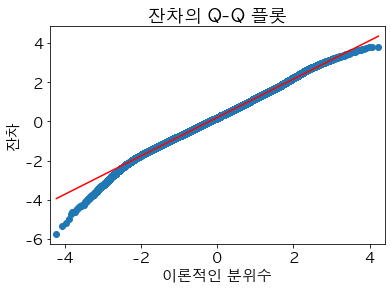

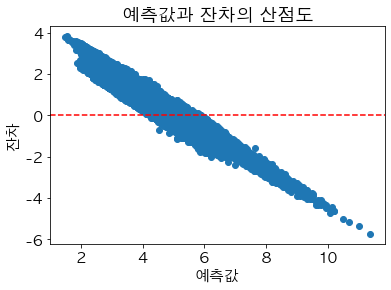

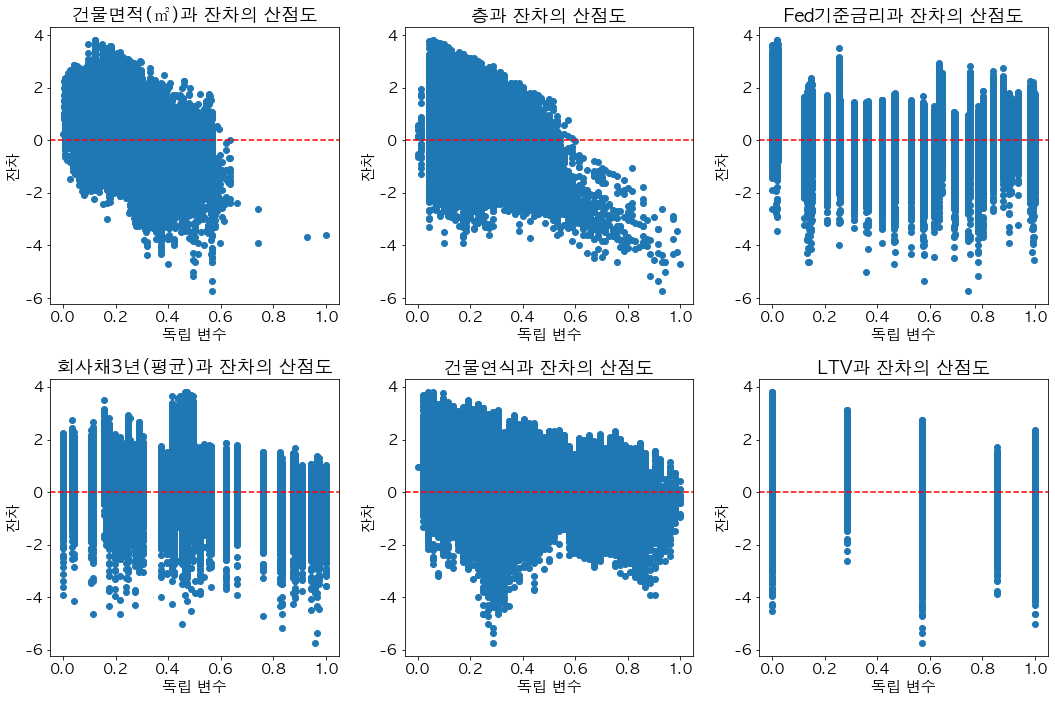

In [71]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()